<a href="https://colab.research.google.com/github/dwm-multimidia/dwm-multimidia.github.io/blob/master/lab2/jupyter/Lab2_Imagem_Video_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 2 - Imagem e Reprodução e Captura de Vídeo

Incorporação das bibliotecas OpenCV e Numpy

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Clonando o nosso repositório do github pra conseguir acessar os arquivos

In [22]:
from pathlib import Path
import shutil

dirGit = Path('/content/dwm-multimidia.github.io/')
if dirGit.exists():
  shutil.rmtree(dirGit)

!git clone https://github.com/dwm-multimidia/dwm-multimidia.github.io.git

dirLab2 = dirGit.joinpath('lab2/jupyter/')
print('\nAgora temos acesso aos arquivos:\n\t', '\n\t '.join([str(arquivo) for arquivo in dirLab2.iterdir()]))

Cloning into 'dwm-multimidia.github.io'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 242 (delta 108), reused 171 (delta 53), pack-reused 0
Receiving objects: 100% (242/242), 56.15 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (108/108), done.

Agora temos acesso aos arquivos:
	 /content/dwm-multimidia.github.io/lab2/jupyter/Lab2_Anexo1_Cap_img_colab_x.ipynb
	 /content/dwm-multimidia.github.io/lab2/jupyter/Lab2_Imagem_Video_v2.ipynb
	 /content/dwm-multimidia.github.io/lab2/jupyter/Pikachu.mp4
	 /content/dwm-multimidia.github.io/lab2/jupyter/Lab2_Anexo2_Cap_vid_colab_x.ipynb
	 /content/dwm-multimidia.github.io/lab2/jupyter/avatares.png
	 /content/dwm-multimidia.github.io/lab2/jupyter/photo1.jpg
	 /content/dwm-multimidia.github.io/lab2/jupyter/messi5.jpg
	 /content/dwm-multimidia.github.io/lab2/jupyter/dimitri_william_matheus.png
	 /content/dwm-multimidia.github.io/lab2/jupyter

<h2> Verificando a Resolução e as Cores

In [23]:
imgmessi = cv.imread(str(dirLab2.joinpath('messi5.jpg')))
altura, largura, camadas = imgmessi.shape
print("Resolução: ", largura, " X ", altura, " PIXELS. ", camadas, " camadas. " )
plt.imshow(imgmessi)
plt.xticks([]), plt.yticks([])
plt.show()

Resolução:  548  X  342  PIXELS.  3  camadas. 


<h2> Versões de imread(), no OpenCV e na biblioteca matplotlib: </h2>
O opencv (cv) com o imread()  lê as cores trocadas...
Vejam o imread() do matplotlib (plt):

Formato da imagem:  (342, 548, 3)
Esta imagem contém 187416 pixels


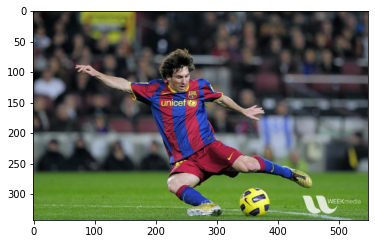

In [ ]:
imagem=plt.imread(str(dirLab2.joinpath('messi5.jpg'))) # imread do plt
print("Formato da imagem: ", imagem.shape)
print(f"Esta imagem contém {imagem.shape[0] * imagem.shape[1]} pixels")
plt.imshow(imagem);
plt.show()

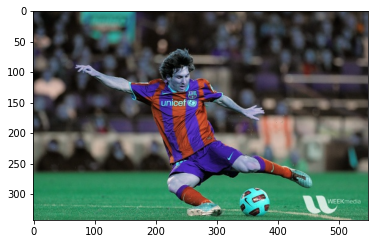

In [ ]:
import cv2 as cv
import os
img = cv.imread(str(dirLab2.joinpath('messi5.jpg')),cv.IMREAD_COLOR)
# BGR
plt.imshow(img)
plt.show()

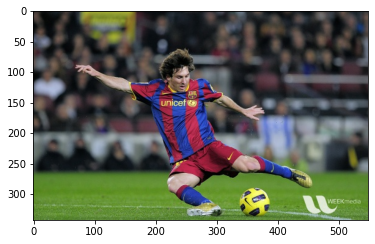

In [ ]:
# Para termos RGB invertem-se a ordem das cores:
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.show()

Vejam estes códigos:

In [ ]:
a = 'DIMITRI MATHEUS WILLIAM'
print(a)

DIMITRI MATHEUS WILLIAM


In [ ]:
b = a[::-1]
print(b)

MAILLIW SUEHTAM IRTIMID


O OpenCV tem uma função para isso, cvtColor():


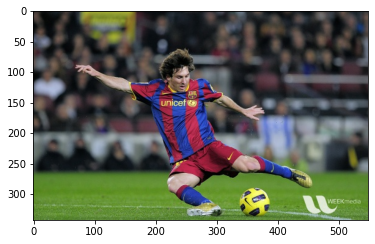

In [ ]:
# BGR to RGB
imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

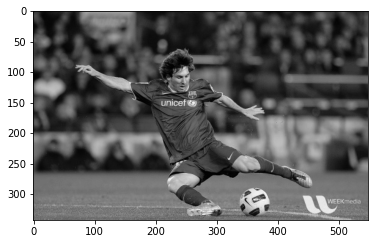

In [ ]:
# Escala de Cinza, o plt.imshow está dando errado...
img_gray = cv.imread(str(dirLab2.joinpath('messi5.jpg')), cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray,'gray')
plt.show()

Usando uma versão do google para o colab, do imshow:


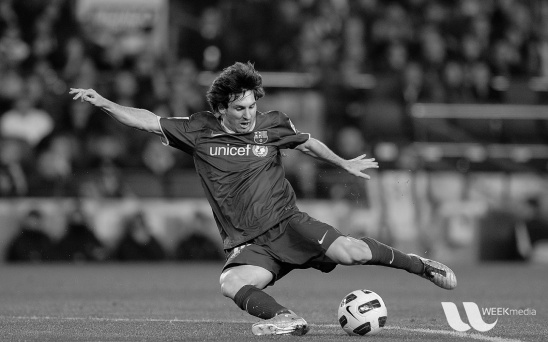

In [ ]:
from google.colab.patches import cv2_imshow # cv2_imshow
cv2_imshow(img_gray)

Podemos usar resize() do OpenCV para mudar a resolução da imagem, façamos com a nossa P&B:

In [ ]:
print(img_gray.shape)
img2 = cv.resize(img_gray, None, fx=1.25, fy=1.25, interpolation = cv.INTER_CUBIC)
print(img2.shape)

(342, 548)
(428, 685)


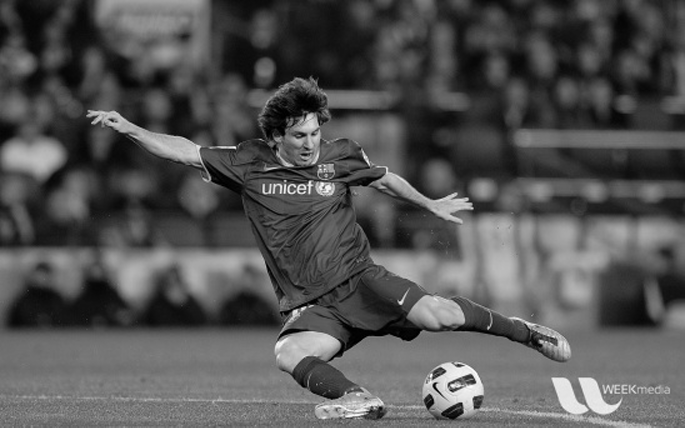

In [ ]:
cv2_imshow(img2)

# REPRODUÇÃO DE VÍDEO

Vamos usar o HTML para exibir vídeos no Colab!

In [ ]:

from IPython.display import HTML
from base64 import b64encode
mp4 = open(str(dirLab2.joinpath('Pikachu.mp4')),'rb').read()
video_decodificado = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=720 controls><source src= {video_decodificado} type="video/mp4"></video>')

# Captura de Imagem (vide Notebook Anexo 1)
# Captura de Vídeo, (vide Notebook Anexo 2)

## Convertendo para 50% da resolução original do vídeo

In [55]:
cap = cv.VideoCapture(str(dirLab2.joinpath('fast_video.mp4')))

fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter(str(dirLab2.joinpath('fast_video_50.mp4')),fourcc, 5, (320,240))

while True:
    ret, frame = cap.read()
    if ret == True:
        b = cv.resize(frame,(320,240),fx=0,fy=0, interpolation = cv.INTER_CUBIC)
        out.write(b)
    else:
        break
        
cap.release()
out.release()


In [53]:
mp4 = open(str(dirLab2.joinpath('fast_video_50.mp4')),'rb').read()
video_decodificado = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=320 controls><source src= {video_decodificado} type="video/mp4"></video>')

## Convertendo para 25% da resolução

In [56]:
cap = cv.VideoCapture(str(dirLab2.joinpath('slow_video.mp4')))

fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter(str(dirLab2.joinpath('slow_video_25.mp4')),fourcc, 5, (192,144))

while True:
    ret, frame = cap.read()
    if ret == True:
        b = cv.resize(frame,(192,144),fx=0,fy=0, interpolation = cv.INTER_CUBIC)
        out.write(b)
    else:
        break
        
cap.release()
out.release()

In [58]:
mp4 = open(str(dirLab2.joinpath('slow_video_25.mp4')),'rb').read()
video_decodificado = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=144 controls><source src= {video_decodificado} type="video/mp4"></video>')